In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Dataset/dataset - netflix1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [4]:
c=df.columns
for i in c:
    df[i] = df[i].replace('Not Given', pd.NA)

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2588
country          287
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

In [6]:
df = df.drop('director',axis = 1 )

In [7]:
df['country'] = df.country.fillna(df['country'].mode()[0])

In [8]:
df['date_added'] = df['date_added'].fillna('No data')

df['year_added'] = df['date_added'].apply(lambda x: x[-4:len(x)])
df['month_added'] = df['date_added'].apply(lambda x: x.split('/')[0])

df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,United States,9/25/2021,2020,PG-13,90 min,Documentaries,2021,9
1,s3,TV Show,Ganglands,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
2,s6,TV Show,Midnight Mass,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9


In [12]:
df['age_group'] = df['rating']
MR_age = {'TV-MA': 'Adults',
          'R': 'Adults',
          'PG-13': 'Teens',
          'TV-14': 'Young Adults',
          'TV-PG': 'Older Kids',
          'NR': 'Adults',
          'TV-G': 'Kids',
          'TV-Y': 'Kids',
          'TV-Y7': 'Older Kids',
          'PG': 'Older Kids',
          'G': 'Kids',
          'NC-17': 'Adults',
          'TV-Y7-FV': 'Older Kids',
          'UR': 'Adults'}
df['age_group'] = df['age_group'].map(MR_age)
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,age_group
0,s1,Movie,Dick Johnson Is Dead,United States,9/25/2021,2020,PG-13,90 min,Documentaries,2021,9,Teens
1,s3,TV Show,Ganglands,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,Adults
2,s6,TV Show,Midnight Mass,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,Adults


In [22]:
import seaborn as sns

<Axes: xlabel='type', ylabel='count'>

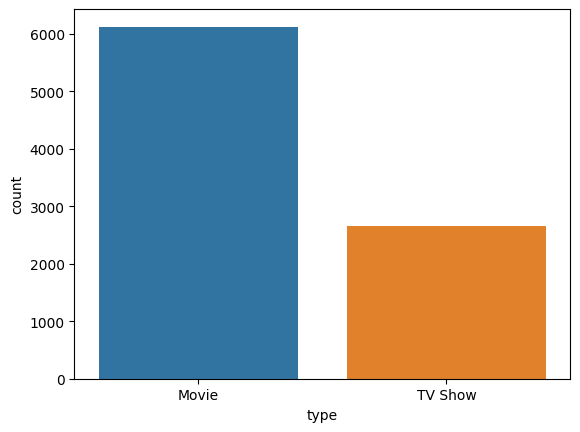

In [23]:
sns.countplot(x = 'type',data= df)

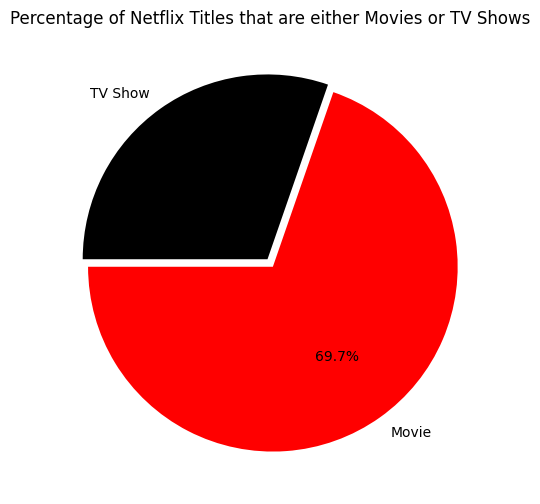

In [45]:
plt.figure(figsize=(12, 6))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(
    df.type.value_counts(),
    explode=(0.025, 0.025),
    labels=df.type.value_counts().index,
    colors=['red', 'black'],
    autopct='%1.1f%%',
    startangle=180
)
plt.show()

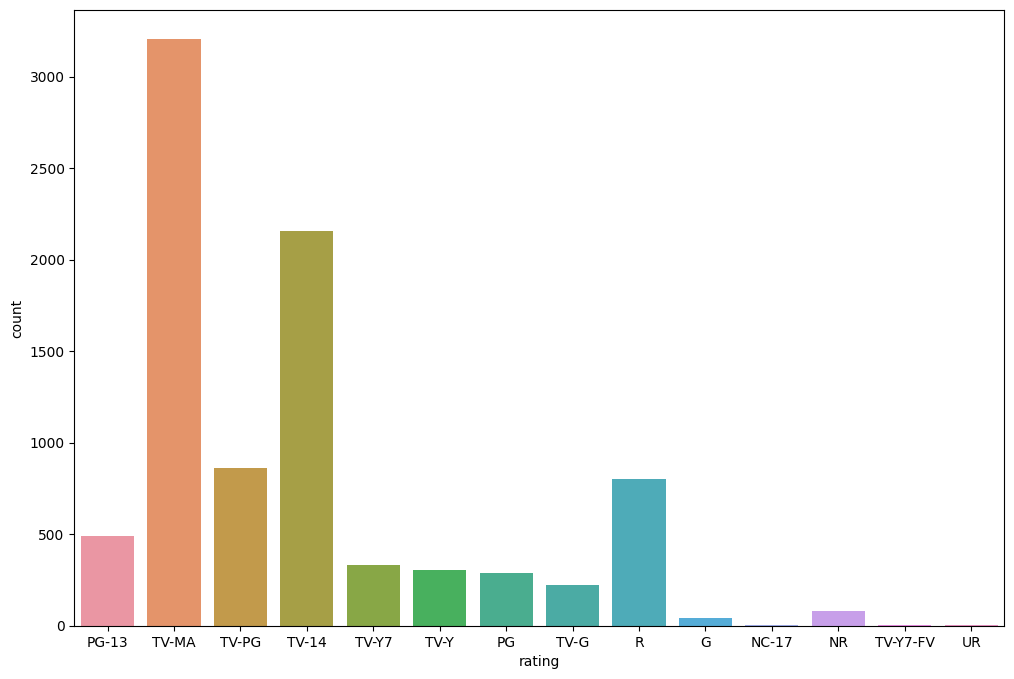

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df)
plt.show() 

<Axes: xlabel='age_group', ylabel='count'>

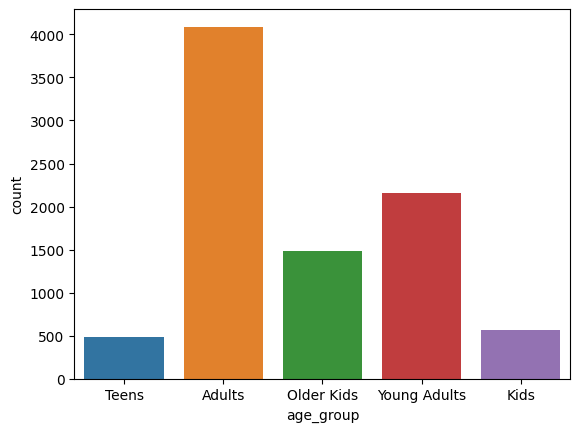

In [25]:
sns.countplot(x='age_group',data = df)

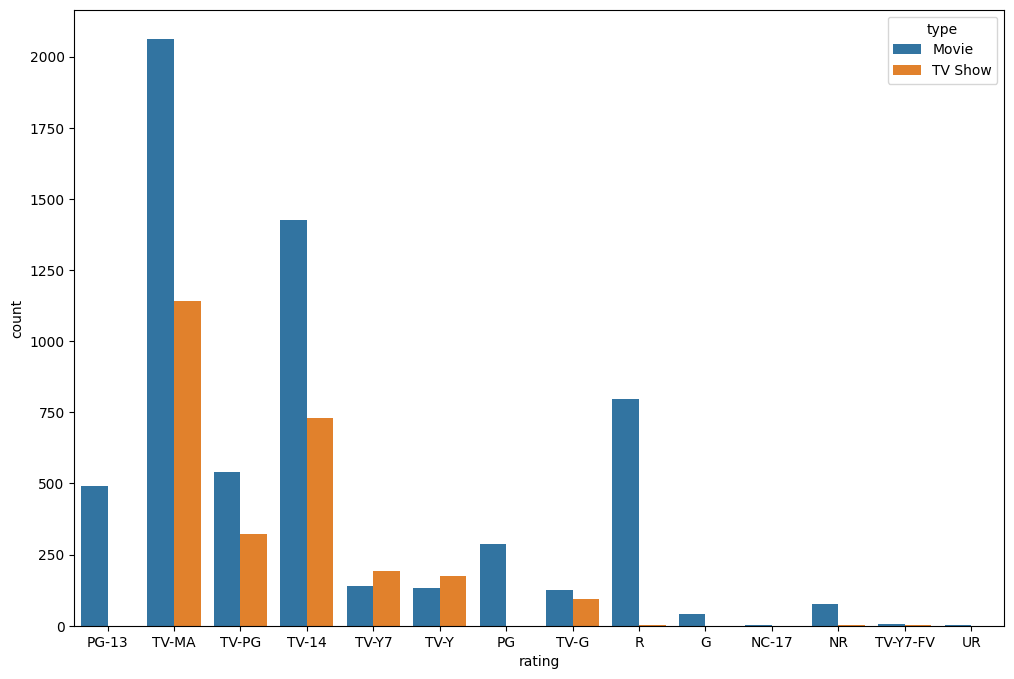

In [30]:
plt.figure(figsize=(12, 8))
sns.countplot(x='rating', data=df, hue='type')
plt.show() 

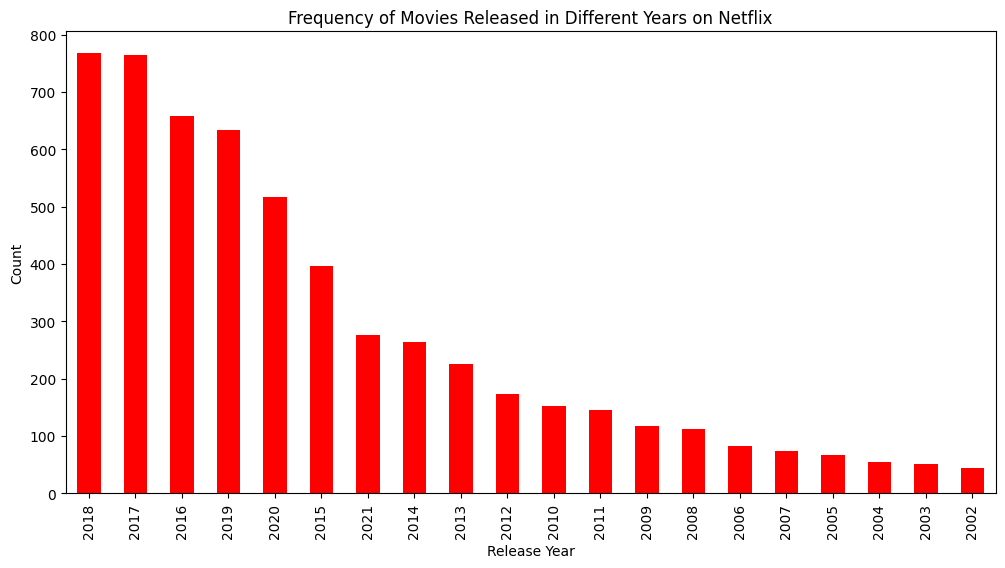

In [32]:
movie_counts = df[df["type"] == "Movie"]["release_year"].value_counts()[:20]

plt.figure(figsize=(12, 6))
movie_counts.plot(kind="bar", color="red")
plt.title("Frequency of Movies Released in Different Years on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

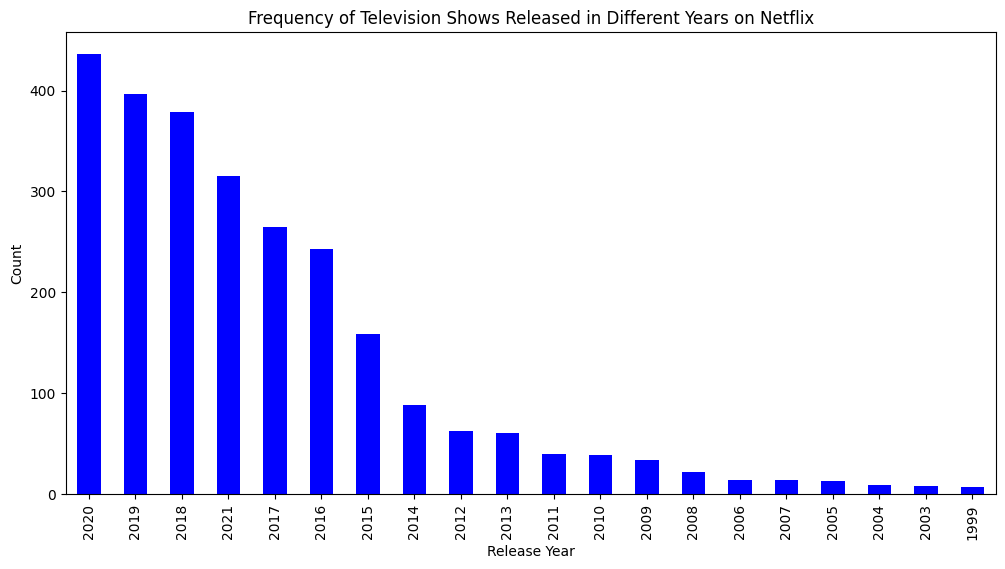

In [33]:
tv_show_counts = df[df["type"] == "TV Show"]["release_year"].value_counts()[:20]

plt.figure(figsize=(12, 6))
tv_show_counts.plot(kind="bar", color="blue")
plt.title("Frequency of Television Shows Released in Different Years on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

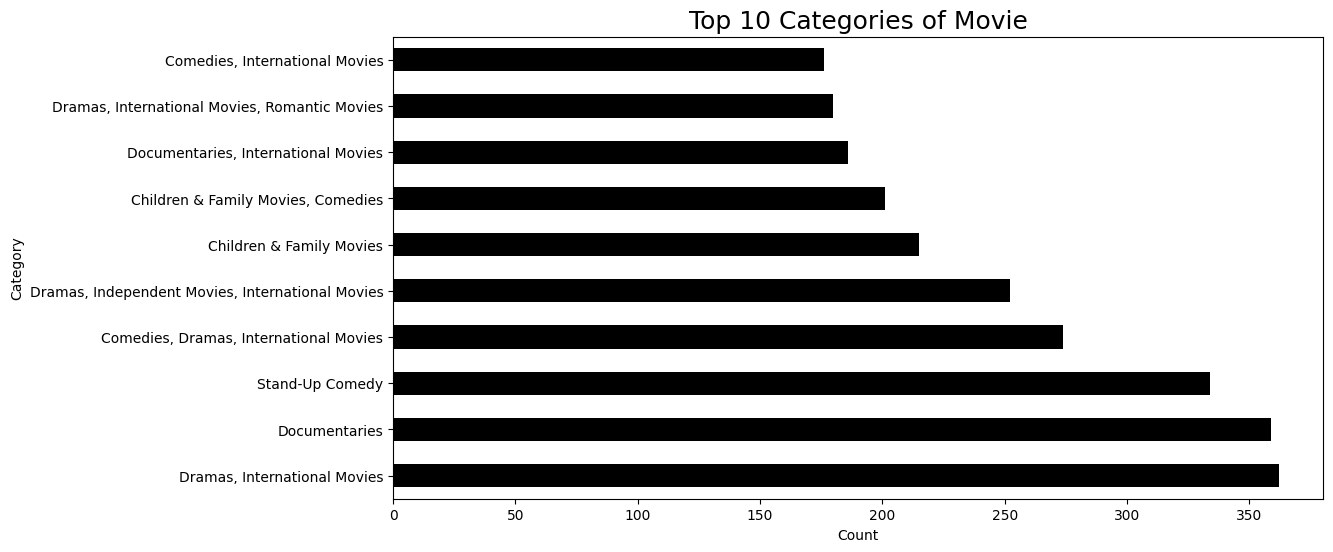

In [38]:
movie_category_counts = df[df["type"] == "Movie"]["listed_in"].value_counts()[:10]

plt.figure(figsize=(12, 6))
movie_category_counts.plot(kind="barh", color="black")
plt.title("Top 10 Categories of Movie", size=18)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

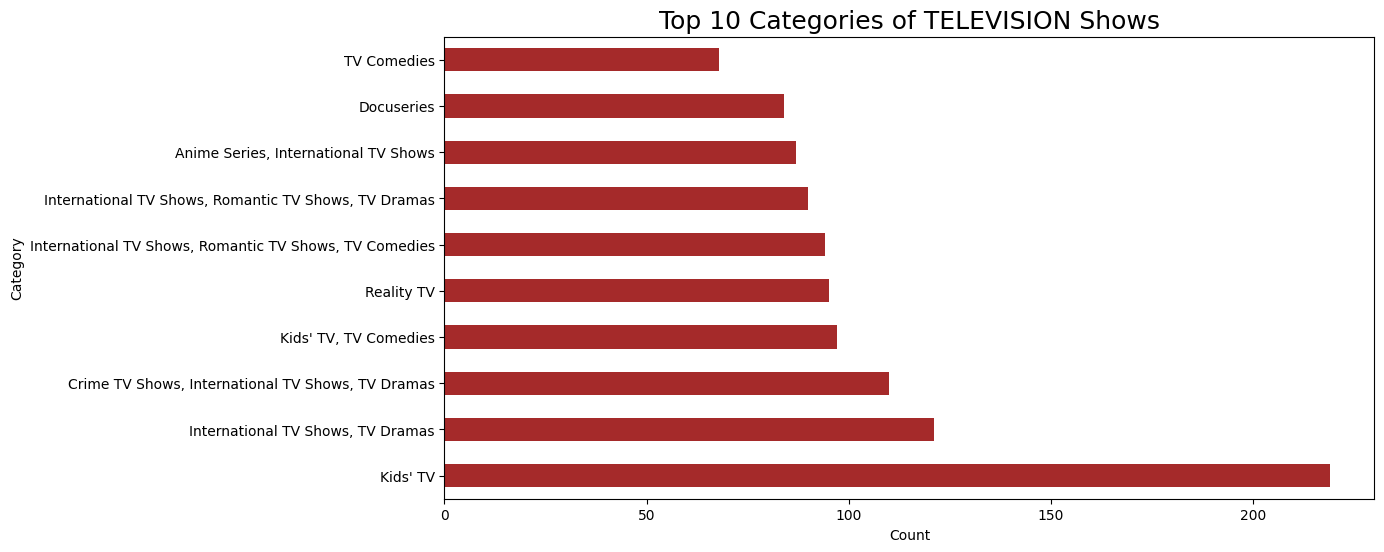

In [41]:
tv_show_category_counts = df[df["type"] == "TV Show"]["listed_in"].value_counts()[:10]

plt.figure(figsize=(12, 6))
tv_show_category_counts.plot(kind="barh", color="brown")
plt.title("Top 10 Categories of TELEVISION Shows", size=18)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

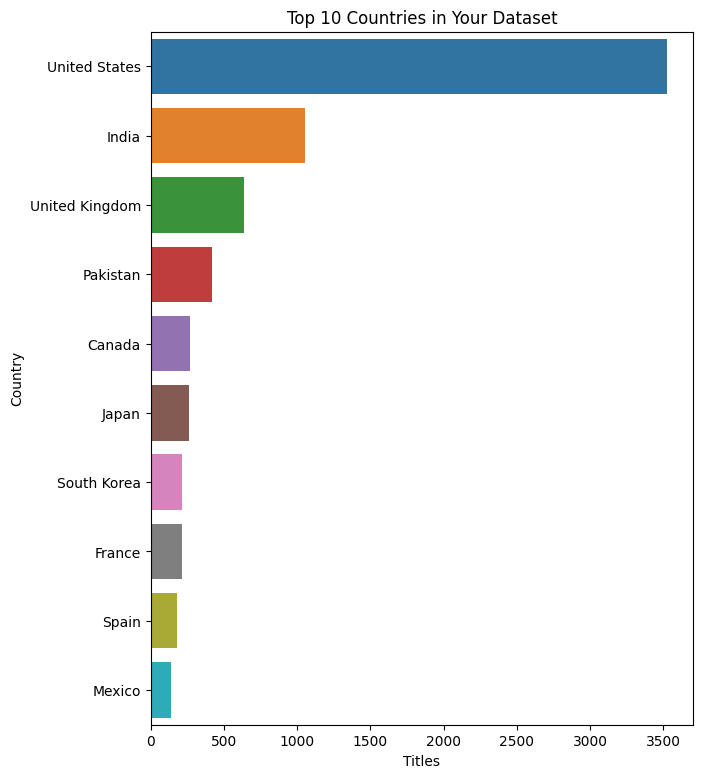

In [50]:
fc = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(7, 9))
g = sns.countplot(y=fc, order=fc.value_counts().index[:10])
plt.title('Top 10 Countries in Your Dataset')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

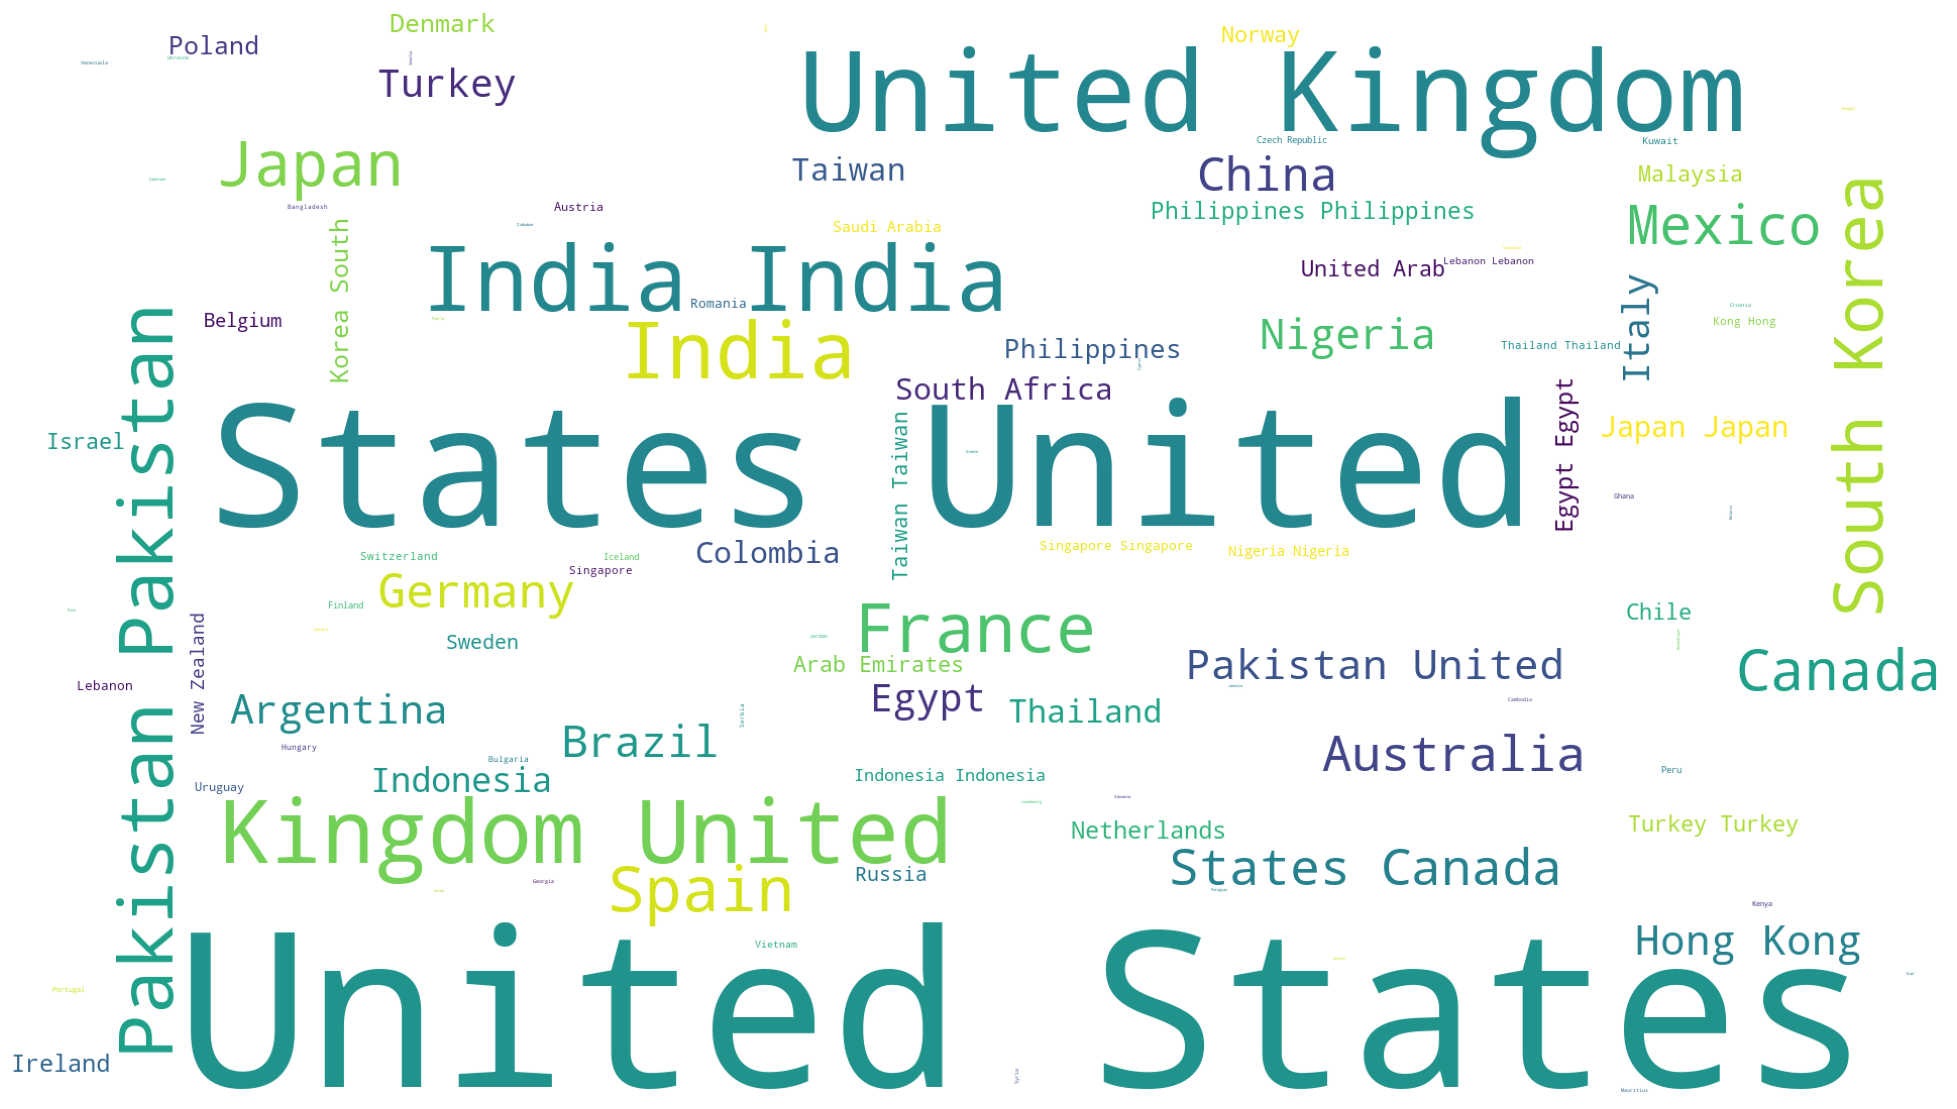

In [63]:
from wordcloud import WordCloud
plt.subplots(figsize=(25, 15))
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

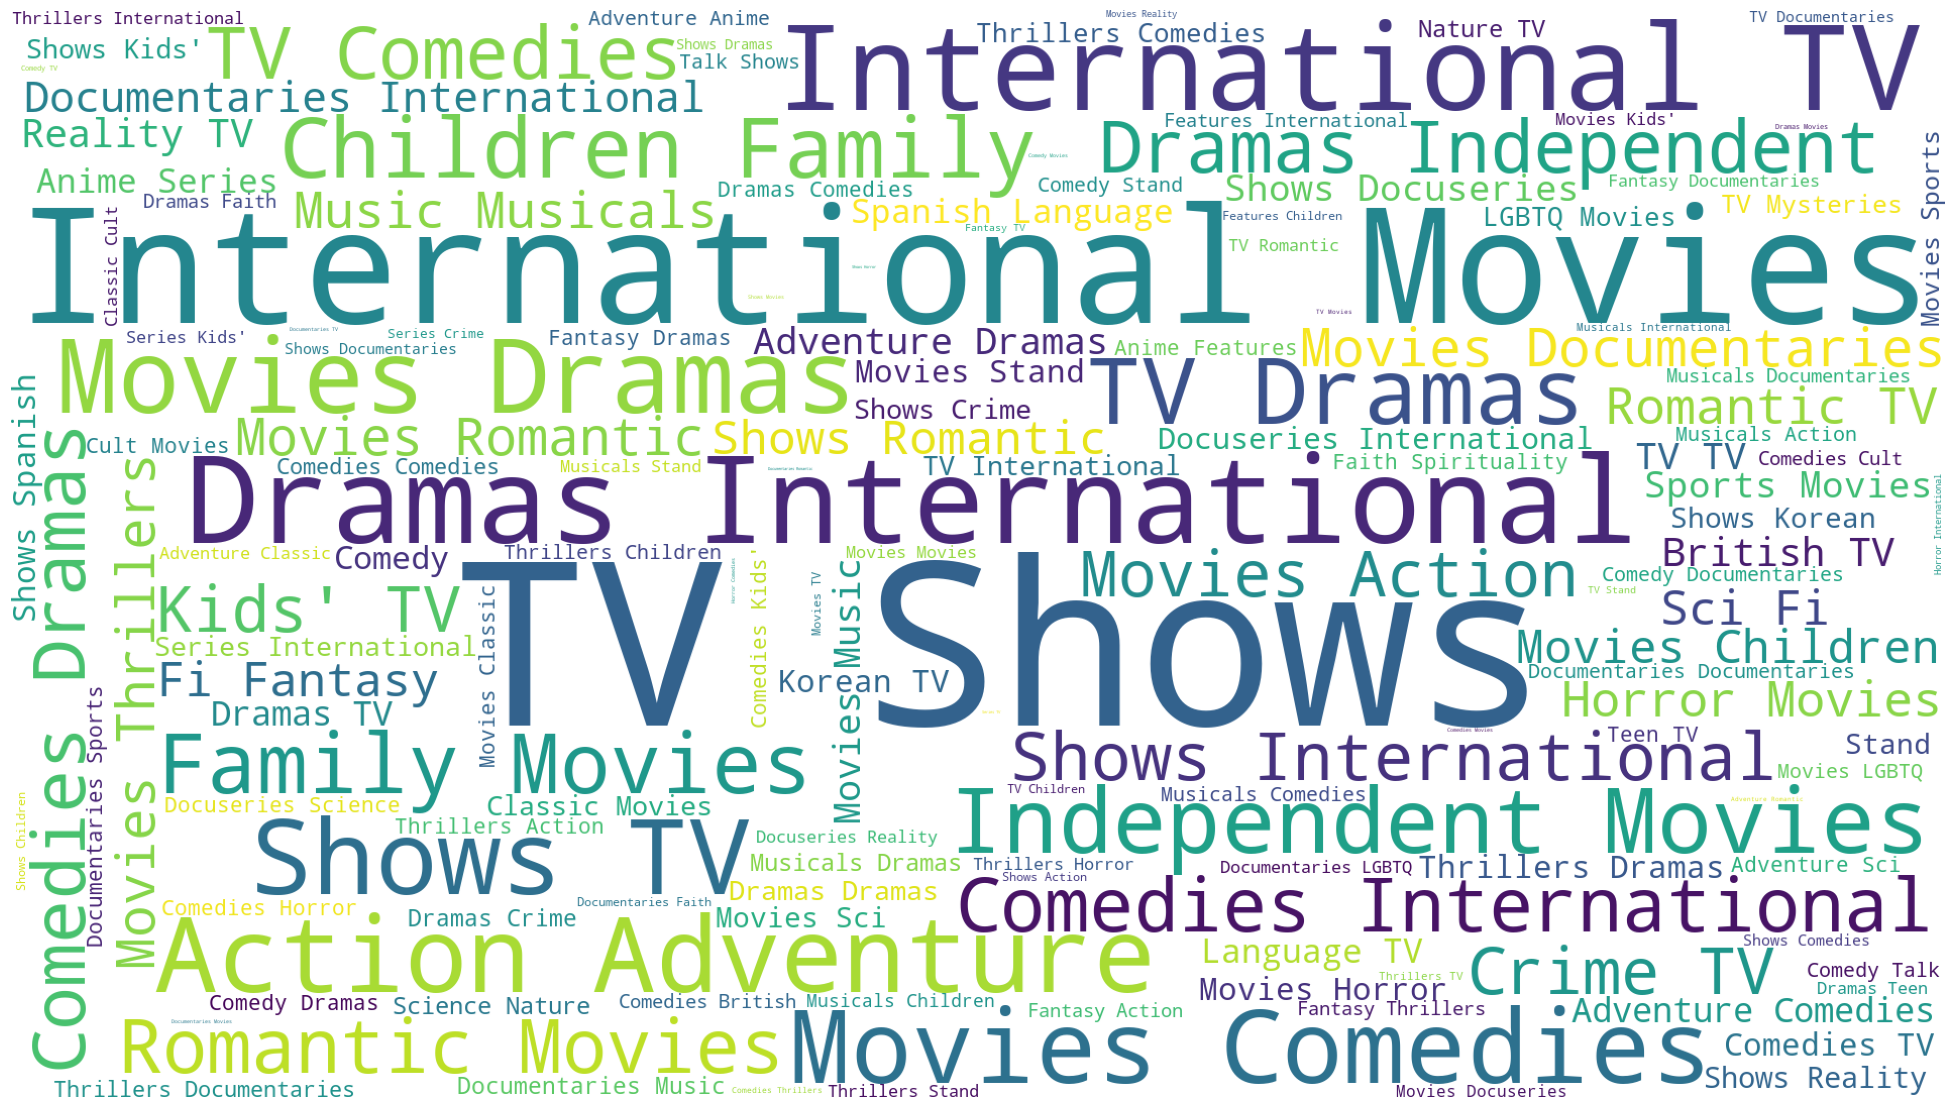

In [66]:
plt.subplots(figsize=(25, 15))
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()